In [38]:
%reset -f
# import the necessary packages
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import numpy as np
np.random.seed(42)

from insectrec.utils import get_dataset

img_dim = 65
modelname = f'testnopretune_{img_dim}'

_, testX, _, testY, labels = get_dataset(dataset='./insectrec/created_data/impy_crops_export/', img_dim = img_dim, encode_labels=False)

 loading images...


## Densenet121 - pre-trained (removed last layer), trained on our data

{'bl': 0, 'c': 1, 'm': 2, 'v': 3, 'v(cy)': 4, 'wmv': 5}
0.7595856392292246


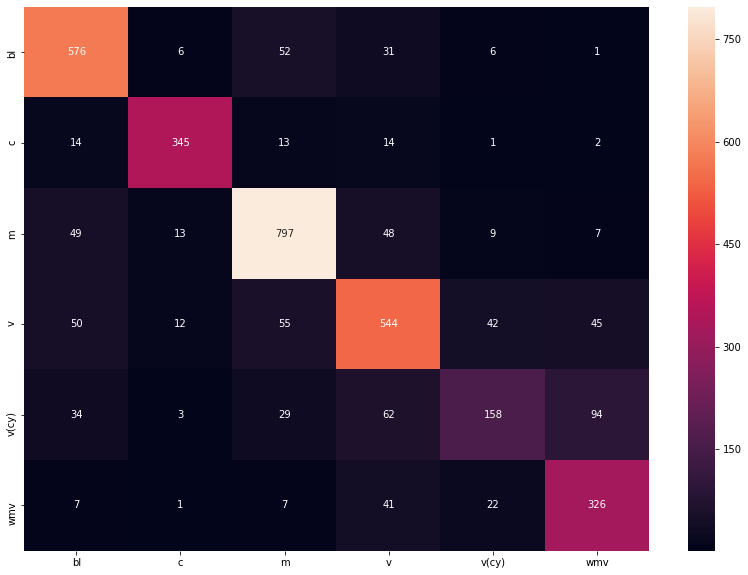

In [40]:
base_model = DenseNet121(include_top=False, weights='imagenet', 
                         input_shape=(img_dim,img_dim,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
top_weights_path = f'./insectrec/created_data/weights/model_{modelname}.h5'
model.load_weights(top_weights_path)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

predY = np.argmax(model.predict(testX, batch_size=128), axis=1)
le = preprocessing.LabelEncoder()
le.fit(labels)
name_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(name_map)
print(balanced_accuracy_score(le.transform(testY), predY))
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(le.fit_transform(testY), predY), annot=True, fmt='.0f', xticklabels=name_map.keys(), yticklabels=name_map.keys())

## DenseNet121 trained from scratch

{'bl': 0, 'c': 1, 'm': 2, 'v': 3, 'v(cy)': 4, 'wmv': 5}
0.7529340955100183


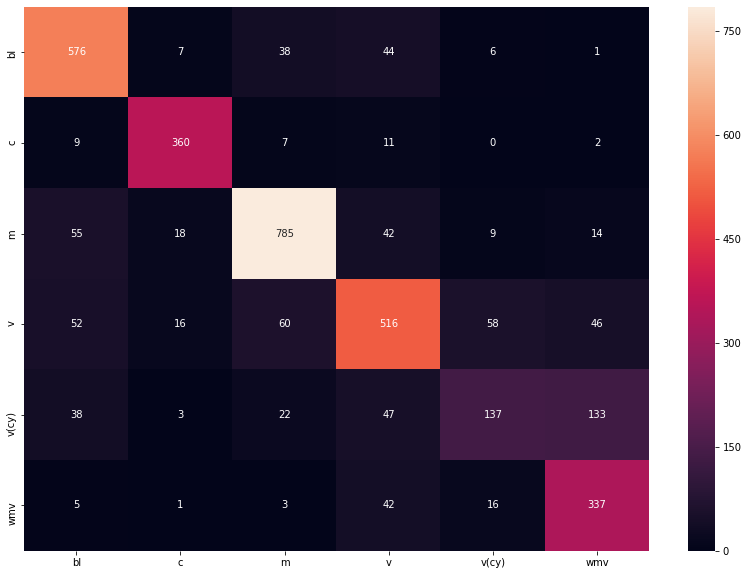

In [36]:
base_model = DenseNet121(include_top=True, weights=None, 
                         input_shape=(img_dim,img_dim,3))
x = base_model.output
# x = GlobalAveragePooling2D()(x)
x = Dense(200, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
top_weights_path = f'./insectrec/created_data/weights/model_{modelname}.h5'
model.load_weights(top_weights_path)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

predY = np.argmax(model.predict(testX, batch_size=128), axis=1)
le = preprocessing.LabelEncoder()
le.fit(labels)
name_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(name_map)
print(balanced_accuracy_score(le.transform(testY), predY))
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(le.fit_transform(testY), predY), annot=True, fmt='.0f', xticklabels=name_map.keys(), yticklabels=name_map.keys())